# Autoencodeur 

Objectif : construire un autoencodeur à deux couches en utilisant Keras :
- l'encodeur compresse l'information dans l'espace latent
- le décodeur reconstruit l'image

## MNIST 

La base de données MNIST (Mixed National Institute of Standards and Technology), est une base de données de chiffres manuscrits. C’est une base de données standard pour le test de nouveaux algorithmes de reconnaissance de ces chiffres. Elle est composée de 60000 images d’apprentissage et 10000 images de test. Les images en noir et blanc, normalisées centrées de 28 pixels de côté.

![mnist.png](./mnist.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as tk
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

On charge ensuite les données MNIST. Les paramètres de la base sont récupérés (nombre d'exemples, de classes, taille de la rétine).

In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


num_examples = x_train.shape[0] 
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1] 
img_shape = (img_size, img_size)

x_train = x_train.reshape((num_examples, num_input))
x_test  = x_test.reshape((num_test, num_input))

# normalisation
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('Taille de la rétine : ',num_input)
print("Nombre d'exemples : ",num_examples)

y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)


Taille de la rétine :  784
Nombre d'exemples :  60000


## Autoencodeur à couches denses
On définit les paramètres de l'autoencodeur

In [3]:
'''
-------------------------------------------------------------------------
Paramètres de l'autoencodeur
-------------------------------------------------------------------------
''' 
lr = 0.1
num_iter = 50
num_epochs = 50
batch_size = 256
n_hidden_1 = 256 
n_hidden_2 = 128 

Définition de l'encodeur. Les potentiels sont des produits scalaires + biais, les fonctions d'activation des ReLU

In [4]:
#TODO

Définition du décodeur.

In [5]:
#TODO

Définition du modèle : autoencodeur à deux couches cachées

In [6]:
#TODO

Représentation de l'espace latent

In [7]:
#TODO

Cout et optimisation

In [8]:
adam = Adam(lr=lr)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

Entraînement et test

Epoch 0 Précision :0.012 


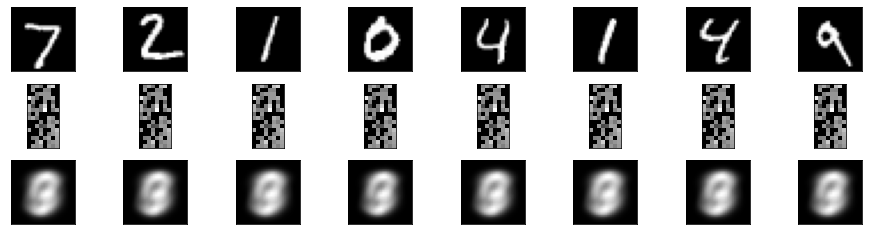

Epoch 20 Précision :0.009 


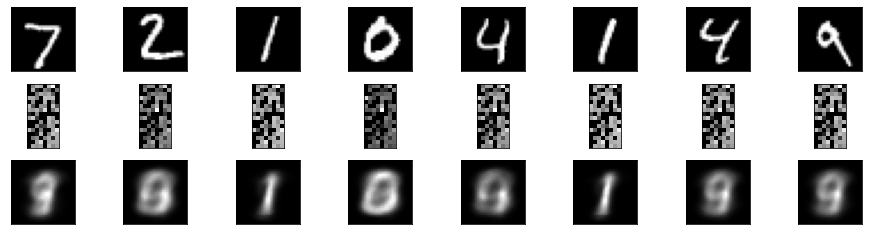

Epoch 40 Précision :0.007 


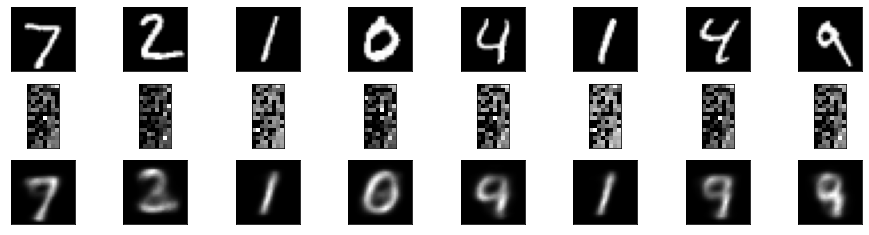

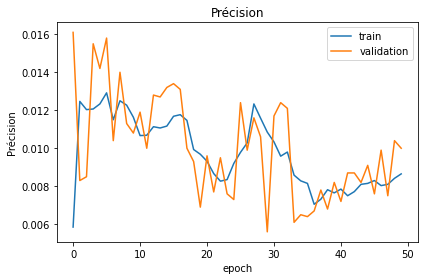

In [9]:
class myCallback(tk.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if((epoch-1) % 20==0):   
            print("Epoch {0:d} Précision :{1:5.3f} ".format(epoch-1,logs.get('acc') ))
            encoded_imgs = encoder.predict(x_test)
            decoded_imgs = model.predict(x_test)


            n = 8  
            plt.figure(figsize=(40, 4))
            for i in range(n):
                ax = plt.subplot(3, 20, i + 1)
                plt.imshow(x_test[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                ax = plt.subplot(3, 20, i + 1 + 20)
                plt.imshow(encoded_imgs[i].reshape(16,8))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                ax = plt.subplot(3, 20, 2*20 +i+ 1)
                plt.imshow(decoded_imgs[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

            plt.show()

            
callbacks = myCallback()

hist = model.fit(x_train, x_train,epochs=num_epochs,
                batch_size=batch_size,shuffle=True,verbose=0,
                validation_data=(x_test, x_test),callbacks=[callbacks])

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Précision')
plt.ylabel('Précision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.tight_layout()